<a href="https://colab.research.google.com/github/Noumzz/RoadTurnsDetection/blob/main/RoadsClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [4]:

# Paths to your local dataset
train_dir = "/content/drive/MyDrive/RoadClassification/train"
val_dir = "/content/drive/MyDrive/RoadClassification/valid"

# Load and normalize the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  # Increase image size for more detail
    batch_size=None         # No batching, load all images at once
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    batch_size=None
)

# Add a batch dimension to the dataset
train_ds = train_ds.batch(1)
val_ds = val_ds.batch(1)

# Normalize images by scaling to [0, 1]
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization
train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)


Found 60 files belonging to 5 classes.
Found 10 files belonging to 5 classes.


In [20]:
# Define data augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    RandomRotation(0.2),                    # Rotate images by up to 20%
    RandomZoom(0.2),                        # Zoom images by up to 20%
])

In [21]:
# Apply data augmentation to the training set
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

# Load the VGG16 model without the top layers
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers on top of the VGG16 base
model = Sequential([
    base_model,
    Flatten(),   # Use global average pooling instead of flattening
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(5, activation='softmax')  # Adjust output for 5 classes
])




In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2357 - loss: 11.4439 - val_accuracy: 0.3000 - val_loss: 5.3811
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.2955 - loss: 8.3318 - val_accuracy: 0.4000 - val_loss: 2.9891
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.3294 - loss: 3.4658 - val_accuracy: 0.5000 - val_loss: 1.2215
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.3920 - loss: 1.5859 - val_accuracy: 0.4000 - val_loss: 3.5400
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4609 - loss: 2.1172 - val_accuracy: 0.4000 - val_loss: 1.2592
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4821 - loss: 1.3368 - val_accuracy: 0.5000 - val_loss: 1.3865
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.2938 - loss: 1.3688 - val_accuracy: 0.7000 - val_loss: 1.2690
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5589 - loss: 1.4221 - val_accuracy: 0.4000 - 

In [44]:
# Paths to the test dataset
test_dir = "/content/drive/MyDrive/RoadClassification/train"

# Load and normalize the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=None
)

# Add a batch dimension to the test set
test_ds = test_ds.batch(1)

# Apply normalization
test_ds = test_ds.map(normalize)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 60 files belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7818 - loss: 0.5472
Test Loss: 0.5191254019737244
Test Accuracy: 0.800000011920929


In [45]:
# Paths to the test dataset
test_dir = "/content/drive/MyDrive/RoadClassification/train"

# Load and normalize the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=None
)

# Add a batch dimension to the test set
test_ds = test_ds.batch(1)

# Apply normalization
test_ds = test_ds.map(normalize)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 60 files belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7675 - loss: 0.5354
Test Loss: 0.5191254019737244
Test Accuracy: 0.800000011920929


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

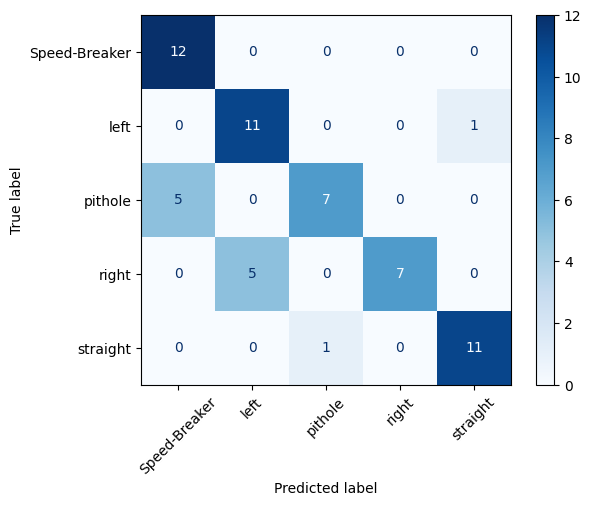

In [46]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to collect true labels and predictions
y_true = []
y_pred = []

# Iterate over the test dataset and get predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted label
    true_labels = labels.numpy()  # Use labels directly without np.argmax if not one-hot encoded

    y_true.extend(true_labels)
    y_pred.extend(predicted_labels)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Define class names in the order retrieved
class_names = ['Speed-Breaker', 'left', 'pithole', 'right', 'straight']

# Generate and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()


In [47]:
# Calculate precision, recall, accuracy, and F1 score
from sklearn.metrics import  ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8370
Recall: 0.8000
Accuracy: 0.8000
F1 Score: 0.7934
